In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df=pd.read_csv("car_data.csv",encoding='cp1252')

In [3]:
df

,ï»¿User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ï»¿User ID    1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


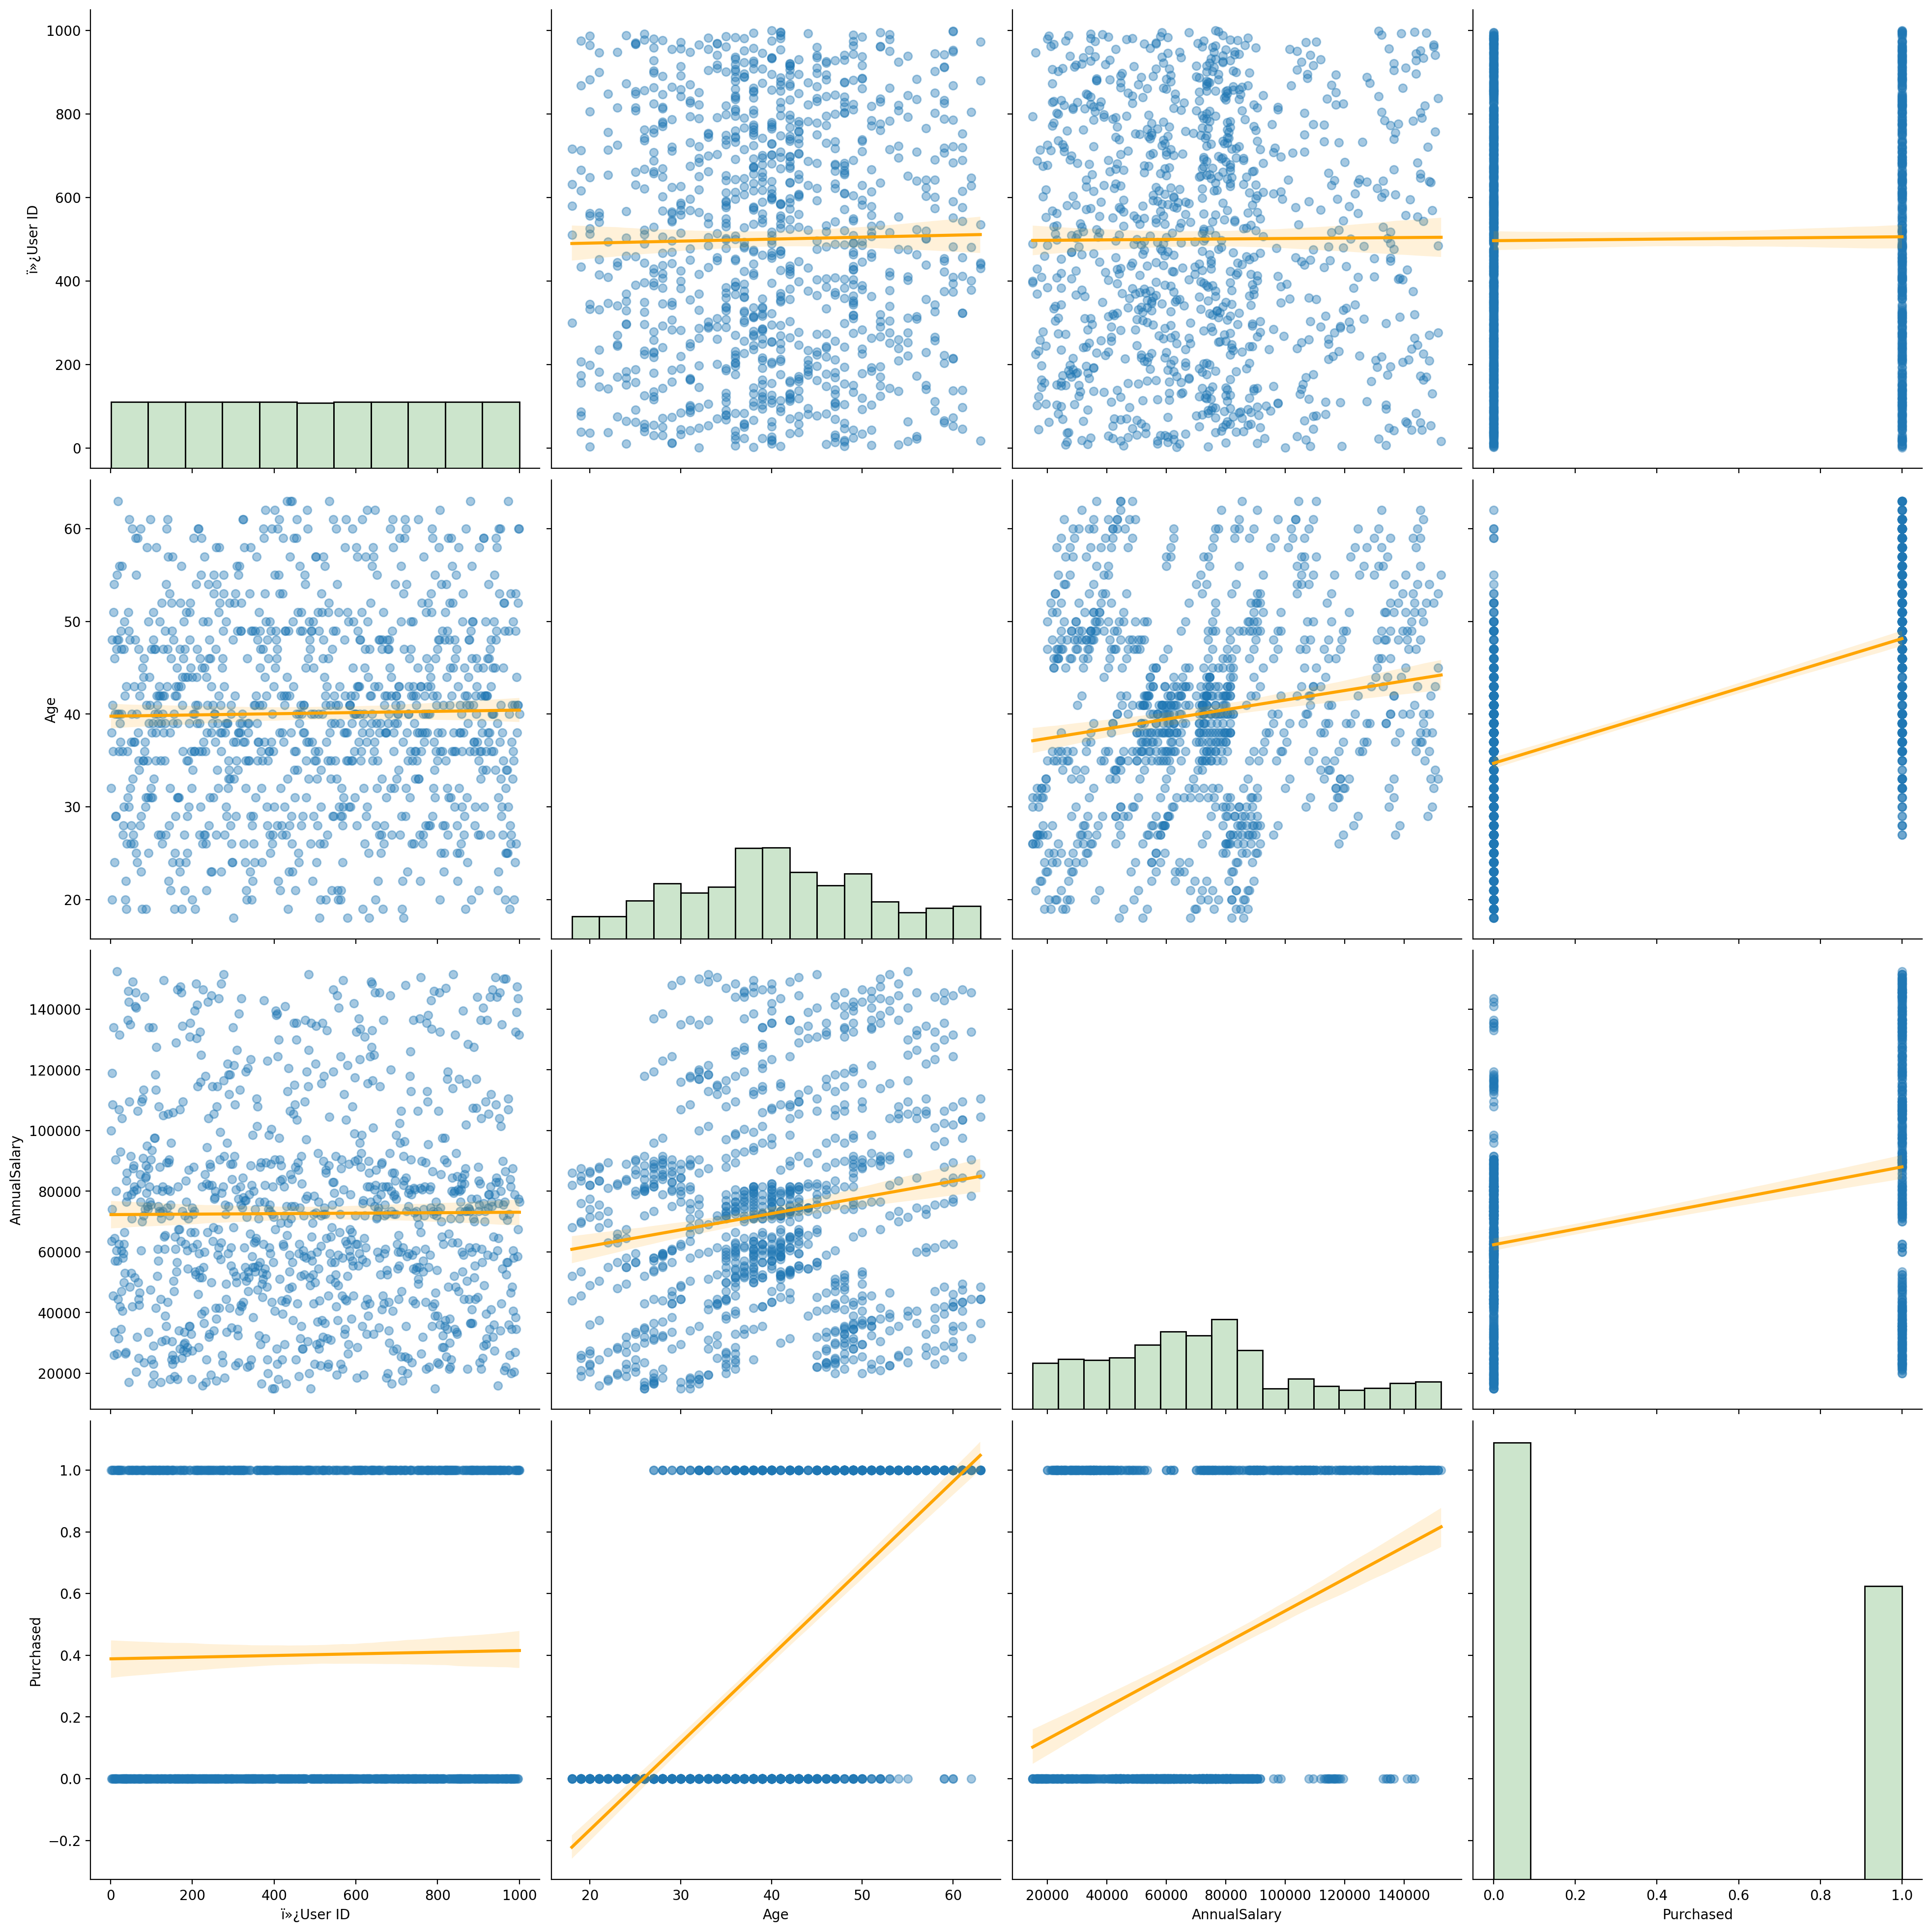

In [5]:
sns.pairplot(df,
             height=5,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                        'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [7]:
df.columns

Index(['ï»¿User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [8]:
# Assuming 'df' is your DataFrame and 'column_to_encode' is the categorical column
encoded_df = pd.get_dummies(df, columns=['Gender'])

In [9]:
encoded_df

,ï»¿User ID,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1
...,...,...,...,...,...,...
995,863,38,59000,0,0,1
996,800,47,23500,0,1,0
997,407,28,138500,1,1,0
998,299,48,134000,1,1,0


In [10]:
#feature selectio
model=DecisionTreeClassifier(random_state=7)
#model=RandomForestClassifier(n_estimators=250,random_state=7)
#model=ExtraTreesClassifier(n_estimators=250,random_state=7)
X=encoded_df[['Gender_Female','Gender_Male','Age', 'AnnualSalary']]
y=encoded_df['Purchased']
model.fit(X,y)

DecisionTreeClassifier(random_state=7)

In [11]:
model.feature_importances_

array([0.02574357, 0.01208019, 0.49131889, 0.47085735])

In [12]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

Gender_Male      0.012080
Gender_Female    0.025744
AnnualSalary     0.470857
Age              0.491319
dtype: float64

In [13]:
fs.sum()

1.0

<Axes: >

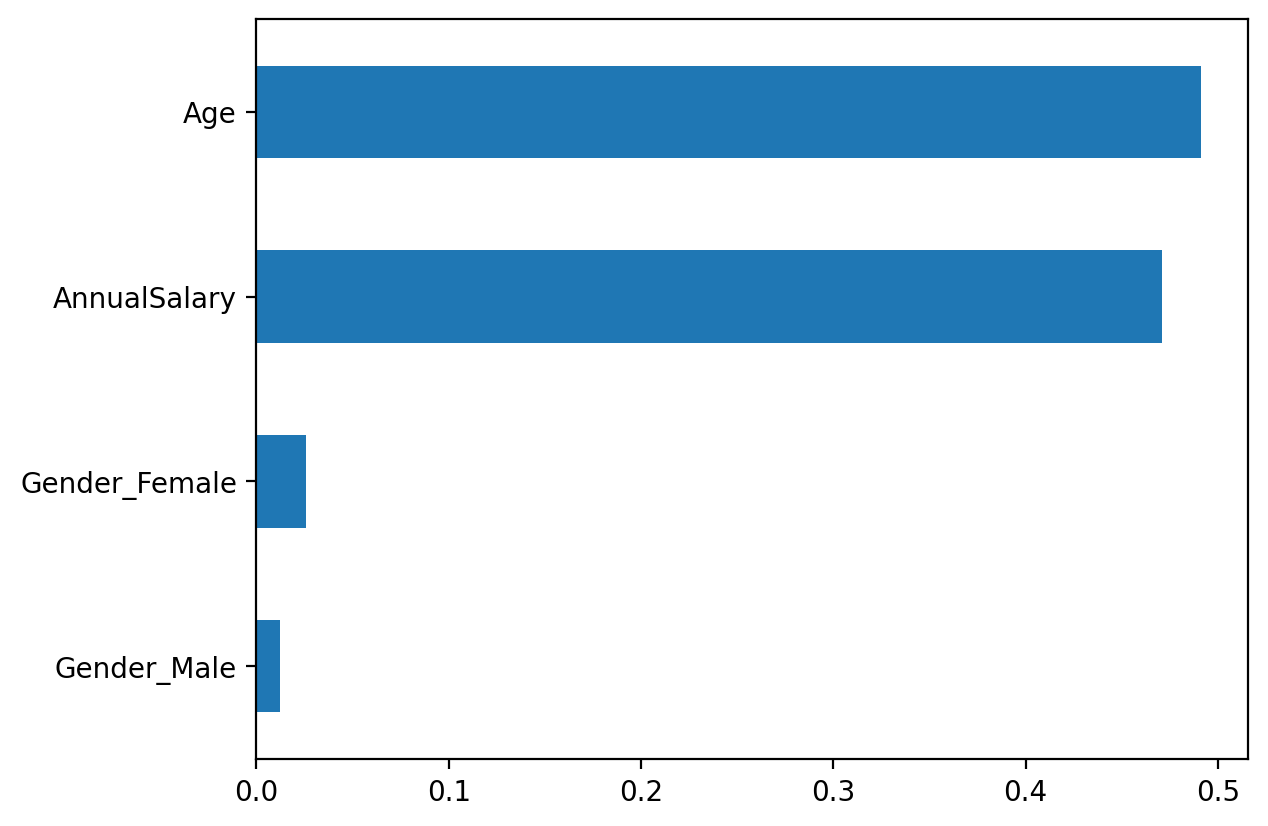

In [14]:
fs.plot(kind='barh')

In [15]:
fs[fs > .1].index

Index(['AnnualSalary', 'Age'], dtype='object')

In [ ]:
X=df[fs[fs > .1].index]
X

In [16]:
#X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
X=df[['AnnualSalary', 'Age']]
#X=df[fs[fs > .1].index]
y=df['Purchased']

In [17]:
#use stratify to split train/test
test_size=.3
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=test_size,
                                                 stratify=y,
                                                 random_state=7)

In [ ]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.8000
[[156  23]
 [ 37  84]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       179
           1       0.79      0.69      0.74       121

    accuracy                           0.80       300
   macro avg       0.80      0.78      0.79       300
weighted avg       0.80      0.80      0.80       300

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.5967
[[179   0]
 [121   0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       179
           1       0.00      0.00      0.00       121

    accuracy                           0.60       300
   macro avg       0.30      0.50      0.37       300
weighted avg       0.36      0.60      0.45       300

----------------------------------------------------------------------------------------------------
Perceptron           score: 

C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

RandomForestClassifier score: 0.8933
[[162  17]
 [ 15 106]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       179
           1       0.86      0.88      0.87       121

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

----------------------------------------------------------------------------------------------------
BaggingClassifier    score: 0.8800
[[163  16]
 [ 20 101]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       179
           1       0.86      0.83      0.85       121

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300

----------------------------------------------------------------------------------------------------
AdaBoostClassifier   score

C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srey.vat\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.40      1.00      0.57       121

    accuracy                           0.40       300
   macro avg       0.20      0.50      0.29       300
weighted avg       0.16      0.40      0.23       300

----------------------------------------------------------------------------------------------------


In [ ]:
model_scores